<a href="https://colab.research.google.com/github/Rufino086/Atividade-Aula-06-Organizador-de-arquivos-/blob/main/Exerc%C3%ADcios_MLP_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Implementando um MLP com TensorFlow

## Introdu√ß√£o ao TensorFlow e ao MLP

O TensorFlow √© uma das bibliotecas mais populares para construir e treinar redes neurais.
Ela fornece uma interface de alto n√≠vel chamada **Keras**, que facilita a cria√ß√£o de modelos como o MLP (Multilayer Perceptron).

Um MLP √© uma rede formada por m√∫ltiplas camadas de neur√¥nios artificiais ‚Äî uma camada de entrada,
camadas ocultas e uma camada de sa√≠da.
Cada camada √© totalmente conectada √† pr√≥xima, e os pesos s√£o ajustados durante o treinamento
por meio do algoritmo de retropropaga√ß√£o e do gradiente descendente.


In [28]:

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


## O conjunto de dados MNIST

O **MNIST** √© um dos conjuntos de dados mais cl√°ssicos no estudo de redes neurais.  
Ele cont√©m **70.000 imagens de d√≠gitos manuscritos** (de 0 a 9), sendo **60.000 para treino** e **10.000 para teste**.

Cada imagem tem:
- **28 √ó 28 pixels**, totalizando **784 pontos**;
- Tons de cinza variando de 0 (preto) a 255 (branco);
- Um **r√≥tulo (label)** indicando qual n√∫mero a imagem representa.

---

### Por que esse conjunto √© importante?

O MNIST √© um √≥timo ponto de partida porque:
- √â pequeno e f√°cil de processar;
- Permite treinar rapidamente modelos simples como o **MLP**;
- Mostra de forma intuitiva como a rede aprende a reconhecer **padr√µes visuais**.

---

### Pr√©-processamento dos dados

As redes neurais trabalham melhor com valores **normalizados** (em faixas pequenas, como de 0 a 1).  
Por isso, dividimos todos os pixels por 255, para que fiquem dentro dessa escala.

Al√©m disso, o **MLP espera vetores como entrada**, e n√£o matrizes bidimensionais.  
Como cada imagem tem 28√ó28 pixels, precisamos **‚Äúachatar‚Äù (flatten)** a matriz em um vetor de 784 posi√ß√µes:

```python
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)
```

Esse processo **n√£o altera as informa√ß√µes da imagem**, apenas muda sua forma para que cada pixel seja tratado como uma **caracter√≠stica (feature)** de entrada.

---

### Formato final dos dados

Ap√≥s o achatamento:
- Cada imagem √© representada por **784 n√∫meros** (intensidades dos pixels);
- Cada n√∫mero indica ‚Äúo quanto de luz‚Äù h√° naquela posi√ß√£o da imagem;
- Assim, o modelo pode usar esses valores como vari√°veis de entrada para aprender os padr√µes que caracterizam cada d√≠gito.

Esse formato √© ideal para redes como o **Perceptron Multicamadas (MLP)**, que operam sobre vetores de atributos em vez de estruturas bidimensionais como imagens.


In [29]:

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normaliza√ß√£o
x_train = x_train / 255.0
x_test = x_test / 255.0

# Flatten
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

print("Formato dos dados de treino:", x_train.shape)


Formato dos dados de treino: (60000, 784)


## Visualizando uma imagem do MNIST e o processo de achatamento

Antes de passarmos para o modelo, vamos **visualizar uma imagem real do MNIST** e entender o que significa "achatar" a matriz 28√ó28 em um vetor de 784 valores.

Cada imagem no MNIST √© uma **matriz bidimensional**, onde cada posi√ß√£o representa a **intensidade do pixel** (entre 0 e 255).

Ao achatar a imagem, transformamos essa matriz em uma **sequ√™ncia linear de n√∫meros**, para que o MLP consiga processar cada pixel como uma *entrada independente*.

O c√≥digo abaixo mostra esse processo visualmente:

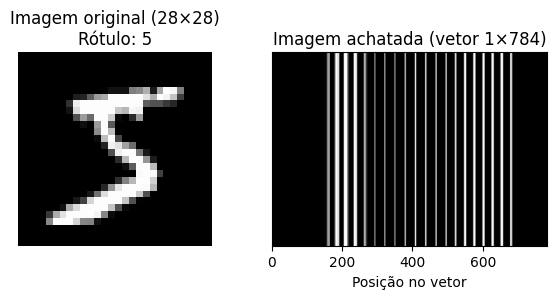

Primeiros 20 valores do vetor achatado:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [30]:
# Carregando o conjunto de dados MNIST
(x_tr_plot, y_tr_plot), (x_ts_plot, y_ts_plot) = keras.datasets.mnist.load_data()

# Seleciona uma imagem qualquer do conjunto de treino
idx = 0
imagem = x_tr_plot[idx]
rotulo = y_tr_plot[idx]
# Achata a imagem (flatten)
vetor = imagem.flatten()

# Figura 1: imagem original 28x28
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plt.imshow(imagem, cmap='gray')
plt.title(f"Imagem original (28√ó28)\nR√≥tulo: {rotulo}")
plt.axis('off')

# Parte 2: imagem achatada (vetor visual)
plt.subplot(1,2,2)
plt.imshow(vetor[np.newaxis, :], cmap='gray', aspect='auto')
plt.title("Imagem achatada (vetor 1√ó784)")
plt.yticks([])
plt.xlabel("Posi√ß√£o no vetor")
plt.tight_layout()
plt.show()

# Exibe os primeiros valores do vetor achatado
print("Primeiros 20 valores do vetor achatado:")
print(vetor[:20])


### O que esse c√≥digo mostra

1. **Imagem original (28√ó28):** matriz bidimensional com as intensidades dos pixels.  
2. **Imagem achatada (1√ó784):** a mesma imagem transformada em um vetor unidimensional, que √© o formato de entrada esperado pelo MLP.  
3. Cada **quadradinho** no vetor corresponde exatamente a um **pixel** da imagem original, apenas reorganizado em sequ√™ncia.  

O achatamento n√£o altera as informa√ß√µes ‚Äî ele apenas muda o formato para que a rede possa processar os dados como uma lista de valores de entrada.

## Construindo o modelo MLP

Agora que os dados est√£o prontos, vamos criar o nosso modelo de rede neural.  
Usaremos a **API `Sequential`** do Keras, que √© a forma mais simples de empilhar camadas em sequ√™ncia ‚Äî da entrada at√© a sa√≠da.

A ideia √© que os dados entrem pela primeira camada (entrada), passem por uma ou mais camadas ocultas e cheguem √† camada de sa√≠da, onde ser√° feita a previs√£o final.

---

### Passo a passo da constru√ß√£o

```python
model = models.Sequential([
    layers.Input(shape=(784,)),            # 28x28 = 784 pixels (camada de entrada)
    layers.Dense(32, activation='relu'),  # Primeira camada oculta
    layers.Dense(32, activation='tanh'),   # Segunda camada oculta
    layers.Dense(128, activation='sigmoid'),
    layers.Dense(32, activation='tanh'),
    layers.Dense(10, activation='softmax')
])
```


In [31]:

model = models.Sequential([
    layers.Input(shape=(784,)),
    layers.Dense(32, activation='relu'),
    layers.Dense(32, activation='tanh'),
    layers.Dense(128, activation='sigmoid'),
    layers.Dense(32, activation='tanh'),
    layers.Dense(10, activation='softmax')
])

model.summary()


Model: "sequential_6"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                    ‚îÉ Output Shape           ‚îÉ       Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ dense_29 (Dense)                ‚îÇ (None, 32)             ‚îÇ        25,120 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_30 (Dense)                ‚îÇ (None, 32)             ‚îÇ         1,056 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_31 (Dense)                ‚îÇ (None, 128)            ‚îÇ         4,224 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_32 (Dense)                ‚îÇ (None, 32)             ‚îÇ         4,128 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_33 (Dense)                ‚îÇ (None, 10)             ‚îÇ           330 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 34,858 (136.16 KB)

 Trainable params: 34,858 (136.16 KB)

 Non-trainable params: 0 (0.00 B)

### Explicando cada parte

**`models.Sequential([...])`**  
Cria um modelo onde as camadas s√£o empilhadas de forma linear ‚Äî a sa√≠da de uma camada √© automaticamente a entrada da pr√≥xima.  
Essa √© a estrutura mais comum para redes *feedforward* como o MLP.

**`layers.Input(shape=(784,))`**  
Define o formato dos dados de entrada.  
No MNIST, cada imagem √© 28√ó28 pixels, e aqui ela foi achatada (*flattened*) em um vetor de 784 posi√ß√µes.

**`layers.Dense(units, activation='relu')`**  
Cria uma camada totalmente conectada (*fully connected*).  
- `units` indica o n√∫mero de neur√¥nios (aqui usamos 128 e depois 64).  
- `activation='relu'` aplica a fun√ß√£o **ReLU (Rectified Linear Unit)**, que substitui valores negativos por zero e ajuda a rede a aprender rela√ß√µes n√£o lineares.

**`layers.Dense(10, activation='softmax')`**  
Cria a camada de sa√≠da com **10 neur√¥nios** (um para cada d√≠gito, de 0 a 9).  
A fun√ß√£o *softmax* converte as sa√≠das em probabilidades que somam 1, permitindo interpretar qual d√≠gito o modelo acredita ser mais prov√°vel.

---

Por fim, podemos visualizar o resumo da arquitetura com:

```python
model.summary()
```

Isso exibe a estrutura da rede e o n√∫mero total de par√¢metros trein√°veis em cada camada.

## Compilando o modelo

Antes de treinar a rede, precisamos **compilar** o modelo.  
Isso significa dizer ao TensorFlow como ele deve aprender a partir dos dados.

Durante a compila√ß√£o, definimos tr√™s informa√ß√µes principais:

1. **Como a rede aprende** ‚Äì ou seja, qual o m√©todo ser√° usado para ajustar os pesos (isso √© controlado pelo otimizador).  
2. **Como medir o erro** ‚Äì uma fun√ß√£o que indica o quanto as previs√µes da rede est√£o diferentes dos valores reais.  
3. **Quais m√©tricas acompanhar** ‚Äì por exemplo, a acur√°cia, que mostra o percentual de acertos.

Mesmo sem entrar em detalhes matem√°ticos agora, o importante √© entender que essa etapa prepara o modelo para o aprendizado, dizendo *o que ele deve minimizar* (o erro) e *como acompanhar o desempenho*.

```python
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
```

O comando acima apenas define essas instru√ß√µes.  
O verdadeiro processo de aprendizado ocorrer√° no momento do **treinamento**, quando o modelo ajustar√° os pesos a partir dos exemplos.


In [32]:

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


## Treinando o modelo

Agora que o modelo foi compilado, podemos **trein√°-lo**.  
√â nesse momento que a rede come√ßa a aprender a reconhecer padr√µes nos dados.

Durante o treinamento, o TensorFlow envia os exemplos de entrada (as imagens do conjunto de treino) para o modelo e compara as previs√µes feitas com os valores reais (os d√≠gitos corretos).  
Com base nessa diferen√ßa, ele ajusta os pesos internos da rede para reduzir o erro ‚Äî esse processo √© conhecido como **retropropaga√ß√£o** (*backpropagation*).

---

### O que acontece em cada etapa

- **√âpoca (epoch)**: representa **uma passagem completa por todos os dados de treino**.  
  Normalmente treinamos o modelo por v√°rias √©pocas, para que ele v√° melhorando gradualmente a cada ciclo.

- **Lote (batch)**: como o conjunto de dados pode ser muito grande, ele √© dividido em pequenos grupos (lotes).  
  A cada lote, o modelo faz previs√µes, calcula o erro e ajusta os pesos ‚Äî isso acelera o processo de aprendizado e evita sobrecarga de mem√≥ria.

- **Retropropaga√ß√£o (backpropagation)**: √© o algoritmo que permite √† rede ajustar seus pesos a partir dos erros cometidos.  
  Ele ‚Äúpropaga o erro para tr√°s‚Äù na rede, atualizando os pesos de forma que a pr√≥xima previs√£o seja mais precisa.

---

### Treinando na pr√°tica

```python
history = model.fit(x_train, y_train, epochs=22, validation_data=(x_test, y_test))
```

O comando acima:
- Treina o modelo por **10 √©pocas**.
- Usa os dados de treino (`x_train`, `y_train`) para ajustar os pesos.  
- Usa os dados de teste (`x_test`, `y_test`) apenas para verificar como a rede est√° se saindo durante o processo (valida√ß√£o).  
- Armazena o hist√≥rico do aprendizado na vari√°vel `history`, que depois pode ser usado para visualizar a evolu√ß√£o da acur√°cia e do erro.

---

Ao final, o modelo dever√° ter aprendido a reconhecer os padr√µes visuais que representam cada d√≠gito (0 a 9).

In [33]:

history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
1875/1875 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 4ms/step - accuracy: 0.7871 - loss: 0.7303 - val_accuracy: 0.9413 - val_loss: 0.1902
Epoch 2/10
1875/1875 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 7s 4ms/step - accuracy: 0.9498 - loss: 0.1681 - val_accuracy: 0.9578 - val_loss: 0.1457
Epoch 3/10
1875/1875 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 7s 4ms/step - accuracy: 0.9606 - loss: 0.1313 - val_accuracy: 0.9564 - val_loss: 0.1483
Epoch 4/10
1875/1875 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6s 3ms/step - accuracy: 0.9678 - loss: 0.1078 - val_accuracy: 0.9590 - val_loss: 0.1443
Epoch 5/10
1875/1875 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 7s 4ms/step - accuracy: 0.9721 - loss: 0.0932 - val_accuracy: 0.9600 - val_loss: 0.1310
Epoch 6/10
1875/1875 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6s 3ms/step - accuracy: 0.9742 - loss: 0.0856 - val_accuracy: 0.9605

## Visualizando o aprendizado

Durante o treinamento, o modelo registra a evolu√ß√£o do seu desempenho em cada √©poca.  
Podemos visualizar esses resultados para entender **como o aprendizado evoluiu** e se o modelo est√° realmente melhorando.

---

### Gr√°fico de acur√°cia

O gr√°fico abaixo mostra a **acur√°cia** (percentual de acertos) do modelo em duas situa√ß√µes:

- **Acur√°cia de treino (`accuracy`)** ‚Üí indica o desempenho do modelo sobre os dados usados para aprender.  
- **Acur√°cia de valida√ß√£o (`val_accuracy`)** ‚Üí mostra como o modelo se comporta com dados que ele **nunca viu antes**, servindo para verificar se o aprendizado est√° se generalizando bem.

```python
plt.plot(history.history['accuracy'], label='Acur√°cia (treino)')
plt.plot(history.history['val_accuracy'], label='Acur√°cia (valida√ß√£o)')
plt.xlabel('√âpocas')
plt.ylabel('Acur√°cia')
plt.title('Evolu√ß√£o do aprendizado')
plt.legend()
plt.show()
```

---

### Como interpretar o gr√°fico

- Se ambas as curvas (treino e valida√ß√£o) **sobem e se aproximam**, o modelo est√° aprendendo bem.  
- Se a acur√°cia de treino continuar subindo, mas a de valida√ß√£o **parar de crescer ou cair**, o modelo pode estar **decorando os dados** (isso √© chamado de *overfitting*).  
- Se ambas as acur√°cias forem baixas, talvez a rede **precise de mais √©pocas** ou **camadas** para aprender padr√µes mais complexos.

---

Visualizar o aprendizado √© uma forma pr√°tica de acompanhar o comportamento do modelo e identificar se ele est√° evoluindo de forma saud√°vel.


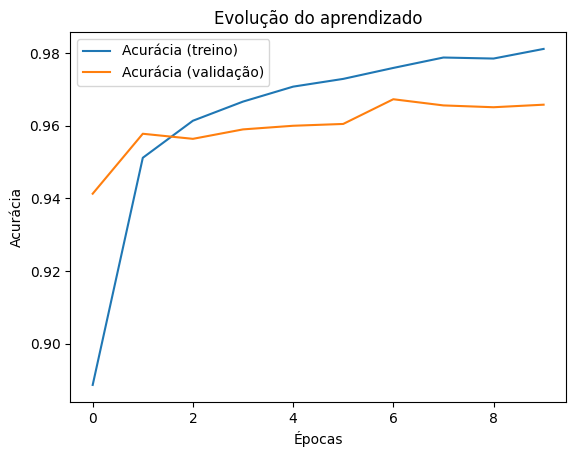

In [34]:

plt.plot(history.history['accuracy'], label='Acur√°cia (treino)')
plt.plot(history.history['val_accuracy'], label='Acur√°cia (valida√ß√£o)')
plt.xlabel('√âpocas')
plt.ylabel('Acur√°cia')
plt.title('Evolu√ß√£o do aprendizado')
plt.legend()
plt.show()


## Avaliando o modelo

Depois que o treinamento termina, √© hora de verificar **como o modelo se sai em dados totalmente novos**.  
Essa etapa √© chamada de **avalia√ß√£o** e serve para medir a capacidade real da rede de generalizar o que aprendeu.

Durante o treino, o modelo j√° viu exemplos dos d√≠gitos v√°rias vezes ‚Äî ent√£o, ele pode ter ‚Äúdecorado‚Äù parte das rela√ß√µes.  
A avalia√ß√£o com o conjunto de **teste** garante que medimos o desempenho sobre imagens que o modelo **nunca viu antes**.

---

### Diferen√ßa entre treino, valida√ß√£o e teste

- **Treino (training set)** ‚Üí usado para ajustar os pesos da rede e ensinar o modelo.  
- **Valida√ß√£o (validation set)** ‚Üí usado durante o treinamento apenas para acompanhar o progresso, ajudando a identificar quando o modelo come√ßa a superajustar.  
- **Teste (test set)** ‚Üí usado **apenas no final**, para avaliar o desempenho final do modelo em dados novos.

---

### Avaliando na pr√°tica

```python
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Acur√°cia no conjunto de teste: {test_acc:.4f}")
```

Esse comando executa o modelo em todas as imagens do conjunto de teste e calcula:

- **Perda (loss)**: representa o erro m√©dio das previs√µes.  
- **Acur√°cia (accuracy)**: mostra o percentual de acertos do modelo.

---

### Interpretando o resultado

Uma acur√°cia alta (acima de 0.90, por exemplo) indica que o modelo conseguiu **aprender bem os padr√µes** do conjunto de dados e est√° **generalizando adequadamente**.  
Se a acur√°cia de teste for muito menor que a de treino, o modelo pode ter **superajustado** ‚Äî ou seja, aprendido demais sobre os exemplos espec√≠ficos de treino, perdendo a capacidade de generalizar.

In [35]:

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Acur√°cia no conjunto de teste: {test_acc:.4f}")


313/313 - 1s - 2ms/step - accuracy: 0.9658 - loss: 0.1261
Acur√°cia no conjunto de teste: 0.9658


## Visualizando previs√µes

Agora que o modelo foi treinado e avaliado, podemos **ver na pr√°tica** como ele realiza as classifica√ß√µes.  
Cada imagem do conjunto de teste √© enviada para a rede, que retorna **10 probabilidades** ‚Äî uma para cada d√≠gito (de 0 a 9).  
O n√∫mero com a maior probabilidade √© considerado a **previs√£o final** do modelo.

---

### Como funciona internamente

- A √∫ltima camada da rede usa a fun√ß√£o **softmax**, que transforma as sa√≠das em **probabilidades que somam 1**.  
- Assim, o modelo n√£o apenas diz ‚Äúqual n√∫mero ele acha que √©‚Äù, mas tamb√©m **o quanto ele tem confian√ßa** nessa resposta.  
- Por exemplo, uma previs√£o pode indicar:
  ```
  [0.01, 0.02, 0.88, 0.03, 0.06, 0.00, 0.00, 0.00, 0.00, 0.00]
  ```
  Nesse caso, o modelo prev√™ que a imagem representa o n√∫mero **2**, com 88% de confian√ßa.

---

### Visualizando as previs√µes

O c√≥digo abaixo mostra algumas imagens do conjunto de teste com suas previs√µes e valores reais:

```python
predictions = model.predict(x_test)

def plot_prediction(i):
    plt.imshow(x_test[i].reshape(28,28), cmap='gray')
    plt.title(f"Previsto: {np.argmax(predictions[i])} | Real: {y_test[i]}")
    plt.axis('off')
    plt.show()

for i in range(5):
    plot_prediction(i)
```

---

### Interpretando os resultados

Ao observar as imagens:
- Se o valor previsto for igual ao valor real, significa que o modelo **reconheceu corretamente o d√≠gito**.  
- Quando houver erro, √© interessante analisar se o d√≠gito era dif√≠cil at√© mesmo para um humano (por exemplo, 4 e 9 mal escritos).  
- Essa etapa ajuda a perceber **onde o modelo ainda confunde padr√µes**, fornecendo pistas para poss√≠veis melhorias (mais camadas, mais dados ou mais √©pocas).

---

Essa visualiza√ß√£o torna o aprendizado mais concreto, permitindo ‚Äúver‚Äù o que a rede aprendeu e como ela toma decis√µes.


313/313 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 2ms/step


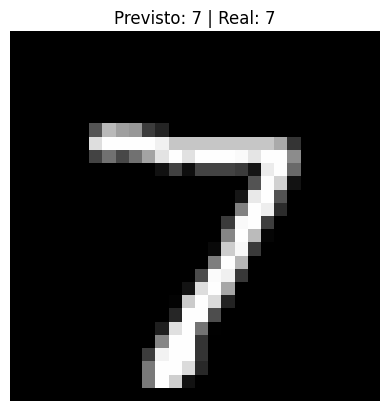

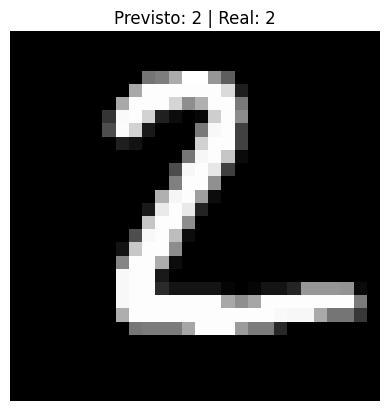

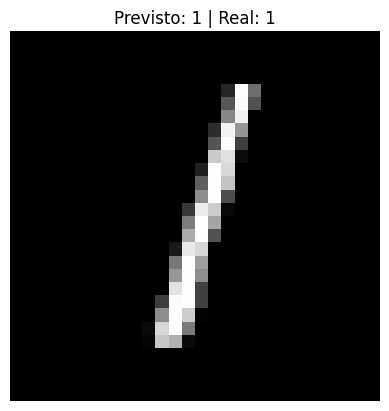

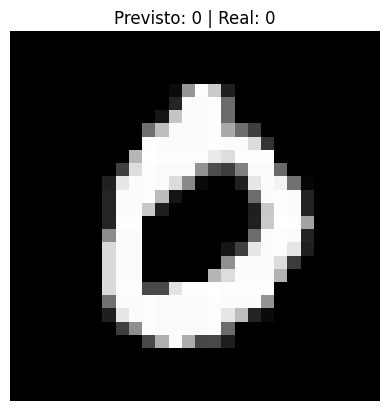

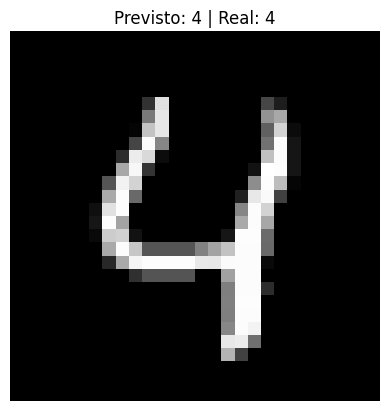

In [36]:

predictions = model.predict(x_test)

def plot_prediction(i):
    plt.imshow(x_test[i].reshape(28,28), cmap='gray')
    plt.title(f"Previsto: {np.argmax(predictions[i])} | Real: {y_test[i]}")
    plt.axis('off')
    plt.show()

for i in range(5):
    plot_prediction(i)



## Conclus√£o

Nesta atividade, constru√≠mos um MLP usando TensorFlow e Keras, explorando:
- A estrutura multicamada do Perceptron;
- O processo de treinamento com retropropaga√ß√£o;
- A import√¢ncia das fun√ß√µes de ativa√ß√£o e do gradiente descendente;
- A capacidade do modelo de aprender padr√µes complexos (no caso, reconhecer d√≠gitos manuscritos).

Esse mesmo racioc√≠nio pode ser aplicado a outros problemas de classifica√ß√£o ‚Äî basta adaptar os dados e o n√∫mero de sa√≠das.


## Exerc√≠cios pr√°ticos

Agora que voc√™ construiu e treinou um MLP para reconhecer d√≠gitos do MNIST, √© hora de **explorar o comportamento do modelo** e observar como as escolhas de arquitetura afetam o resultado.

### 1Ô∏è‚É£ Varia√ß√£o de camadas e neur√¥nios
Crie novos modelos modificando:
- O **n√∫mero de camadas ocultas** (tente usar 1, 2 ou 3 camadas);
- O **n√∫mero de neur√¥nios** em cada camada (por exemplo, 32, 64, 128, 256).

Treine cada modelo e **compare a acur√°cia final** e o tempo de treinamento.

> üí° *Dica:* redes maiores tendem a aprender mais, mas tamb√©m podem demorar mais e correr o risco de ‚Äúdecorar‚Äù os dados (overfitting).

---

### 2Ô∏è‚É£ Fun√ß√µes de ativa√ß√£o
Troque a fun√ß√£o de ativa√ß√£o `relu` por outras, como:
```python
activation='sigmoid'
```
ou
```python
activation='tanh'
```

Observe como isso influencia:
- A **velocidade de aprendizado** (as curvas sobem mais devagar ou mais r√°pido?);
- A **acur√°cia final** do modelo.

---

### 3Ô∏è‚É£ N√∫mero de √©pocas
Mude o n√∫mero de √©pocas no treinamento:
```python
model.fit(x_train, y_train, epochs=5, ...)
```
ou
```python
model.fit(x_train, y_train, epochs=20, ...)
```

Compare as curvas de treino e valida√ß√£o para identificar quando o modelo **come√ßa a parar de melhorar** ou **superajusta**.

---

### 4Ô∏è‚É£ Avalia√ß√£o visual
Escolha algumas imagens em que o modelo errou e tente entender **por que** ele se confundiu.  
Voc√™ pode usar o c√≥digo abaixo como ponto de partida:

```python
for i in range(100):
    pred = np.argmax(predictions[i])
    real = y_test[i]
    if pred != real:
        plt.imshow(x_test[i].reshape(28,28), cmap='gray')
        plt.title(f"Previsto: {pred} | Real: {real}")
        plt.axis('off')
        plt.show()
        break
```

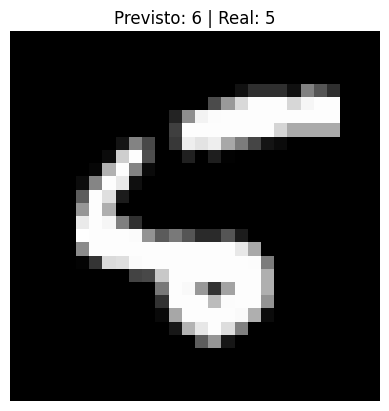

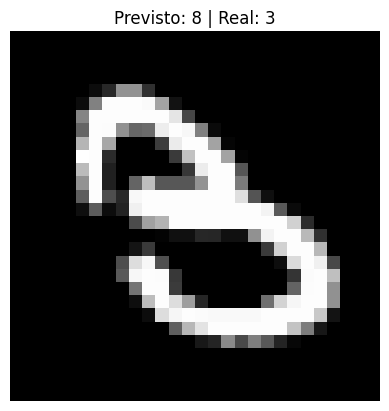

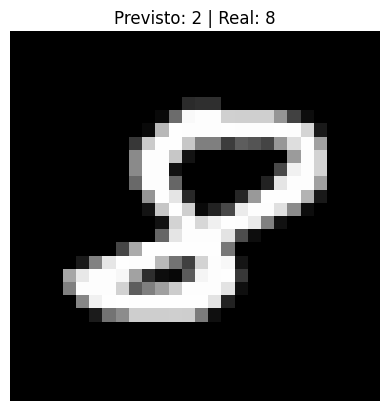

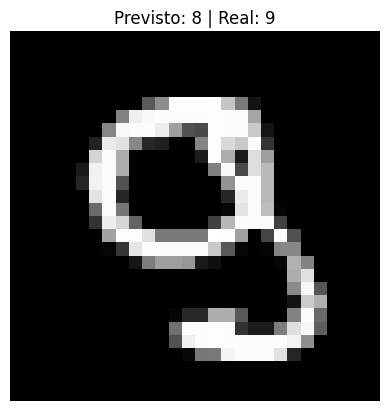

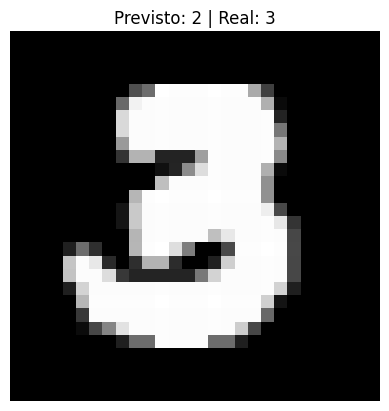

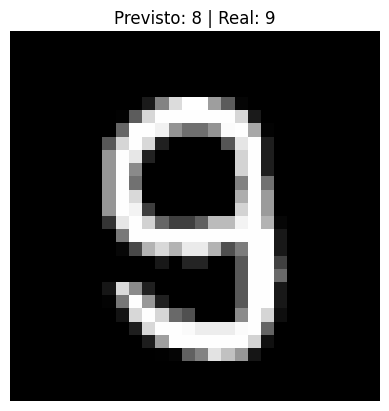

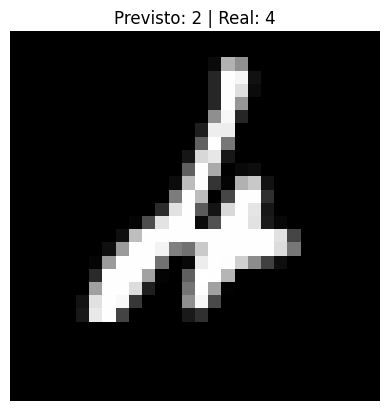

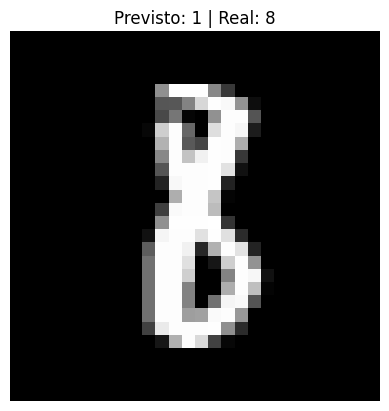

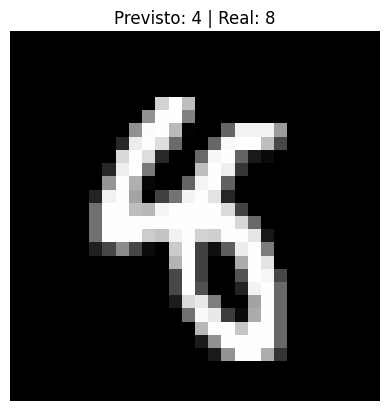

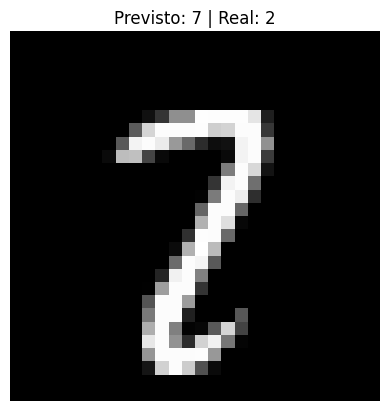

In [39]:
erros = 0
for i in range(len(x_test)):
    pred = np.argmax(predictions[i])
    real = y_test[i]
    if pred != real:
        plt.imshow(x_test[i].reshape(28,28), cmap='gray')
        plt.title(f"Previsto: {pred} | Real: {real}")
        plt.axis('off')
        plt.show()
        erros += 1
        if erros == 10:
            break


O modelo se confunde porque alguns d√≠gitos escritos √† m√£o s√£o muito parecidos visualmente, como 8 e 9 ou 4 e 2. Al√©m disso, o MLP n√£o entende bem padr√µes espaciais, analisando os pixels de forma mais simples, o que dificulta reconhecer formas humanas variadas. O desempenho tamb√©m pode ser limitado por poucas √©pocas de treino ou baixa complexidade do modelo